In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving house_data.csv to house_data.csv


In [13]:
df = pd.read_csv('house_data.csv')
df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000


In [8]:
# df.isnull().sum()

In [17]:
df = df.fillna(df.mean()) # to fill null values with mean

In [18]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 720x432 with 0 Axes>

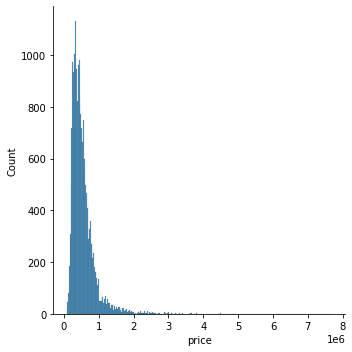

In [31]:
plt.figure(figsize=(10,6))
sns.displot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


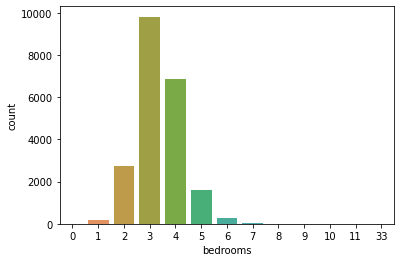

In [22]:
sns.countplot(df['bedrooms'])

In [25]:
df.corr()['price'].sort_values() # sqft_living is highly correlated with price

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605565
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

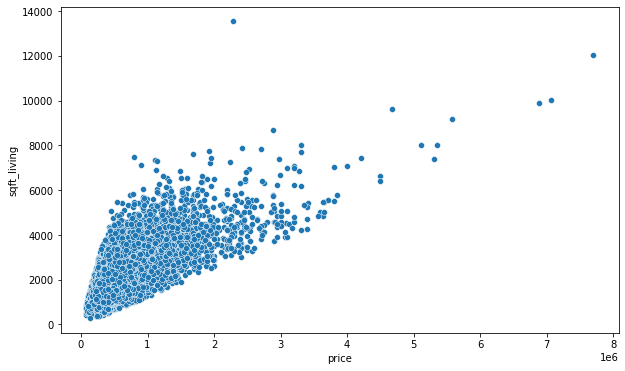

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='sqft_living',data=df)

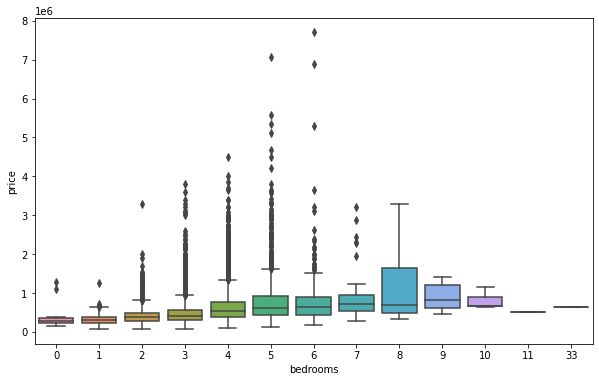

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price',data=df)

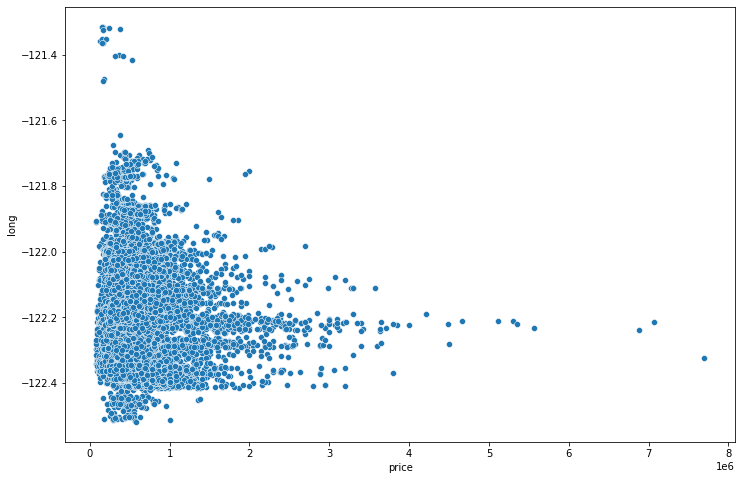

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

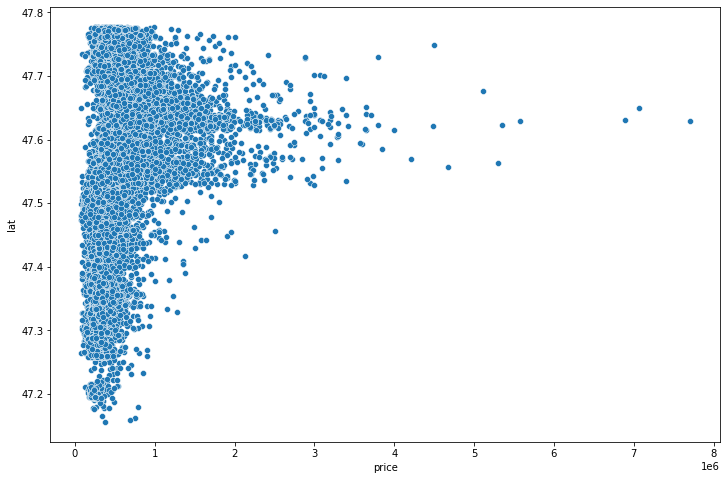

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

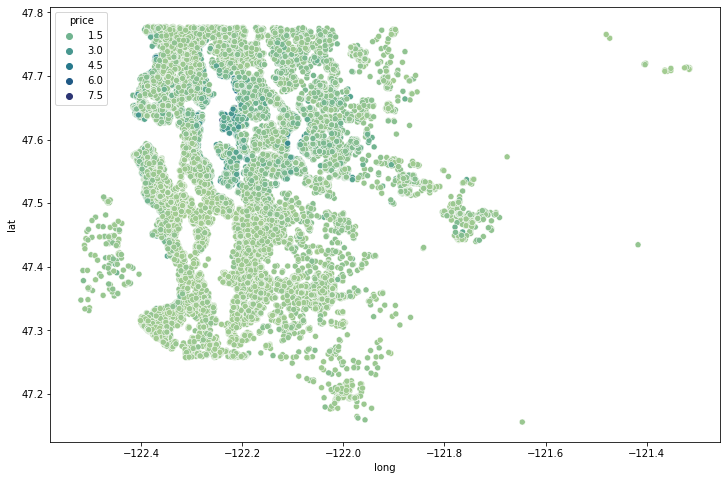

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='crest')

In [45]:
df.sort_values('price',ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000.0,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990.0,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820.0,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350.0,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430.0,0,2001,0,98004,47.6208,-122.219,3720,14592


In [48]:
len(df)*0.01

216.13

In [50]:
bottom_99_perc = df.sort_values('price',ascending=False).iloc[216:]

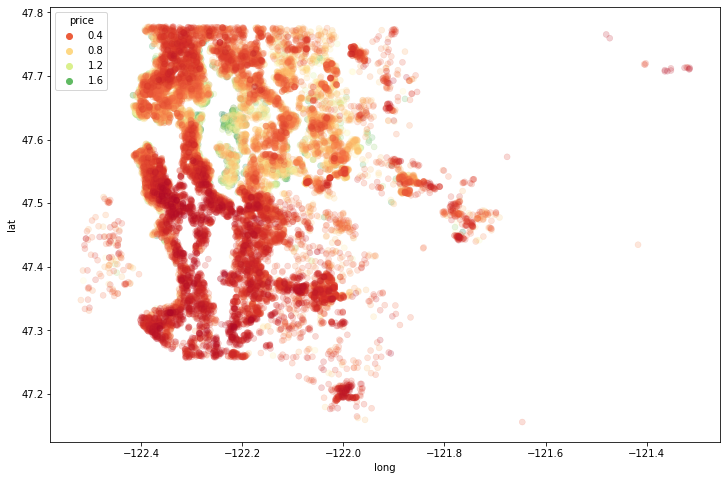

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=bottom_99_perc,edgecolor=None,alpha=0.2,hue='price',palette='RdYlGn')

In [56]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

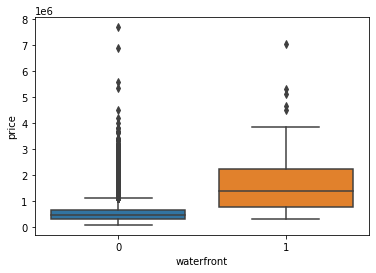

In [55]:
sns.boxplot(x='waterfront',y='price',data=df)

In [57]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
df = df.drop('id',axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
df['date'] = pd.to_datetime(df['date'])

In [60]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [61]:
# def year_extract(date):
#   return date.year

In [62]:
df['year'] = df['date'].apply(lambda date: date.year)

In [63]:
df['month'] = df['date'].apply(lambda date: date.month)

In [64]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


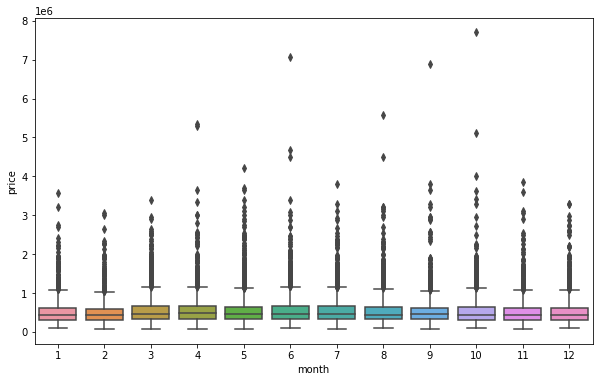

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

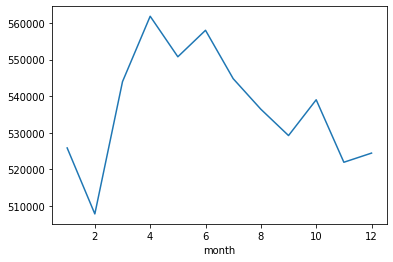

In [66]:
 df.groupby('month').mean()['price'].plot()

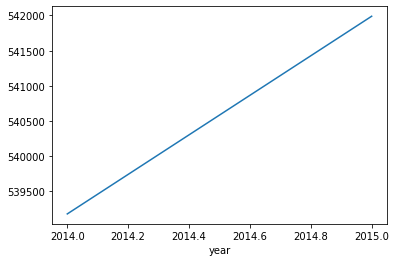

In [67]:
 df.groupby('year').mean()['price'].plot()

In [71]:
# df = df.drop('date',axis=1)

In [72]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [73]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [74]:
df = df.drop('zipcode',axis=1)

In [75]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [89]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
X_train = scaler.fit_transform(X_train)

In [95]:
X_test = scaler.transform(X_test)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [96]:
model = Sequential()

In [98]:
X_train.shape # 19 incoming features

(15129, 19)

In [97]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [99]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 426307254681.6000 - val_loss: 433014833152.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 424691562905.6000 - val_loss: 429538050048.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 418242803302.4000 - val_loss: 395135844352.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 354763321344.0000 - val_loss: 271903719424.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 231133017156.2667 - val_loss: 129032241152.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 120080729770.6667 - val_loss: 104562835456.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97846915959.4667 - val_loss: 102788071424.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96535344196.2667 - val_loss: 101168734208.0000
Epoch 9/400
119/11

In [102]:
pd.DataFrame(model.history.history) # check overfitting

,loss,val_loss
0,4.236267e+11,4.330148e+11
1,4.226645e+11,4.295381e+11
2,4.082882e+11,3.951358e+11
3,3.341217e+11,2.719037e+11
4,1.864082e+11,1.290322e+11
...,...,...
395,2.816593e+10,2.823653e+10
396,2.818070e+10,2.800217e+10
397,2.814508e+10,2.802454e+10
398,2.820391e+10,2.799278e+10


<Figure size 720x432 with 0 Axes>

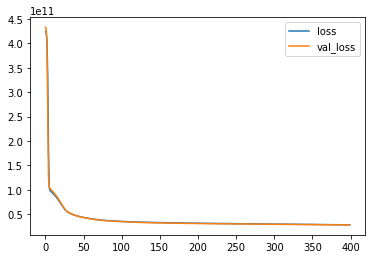

In [105]:
plt.figure(figsize=(10,6))
loss = pd.DataFrame(model.history.history)
loss.plot()  # perfect behaviour we wanted to see / no overfitting

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [107]:
predictions = model.predict(X_test)

In [109]:
mean_squared_error(y_test,predictions)

28055713423.78923

In [110]:
np.sqrt(mean_squared_error(y_test,predictions))

167498.39827230954

In [111]:
mean_absolute_error(y_test,predictions)

104083.34268728794

In [113]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [114]:
5.400881e+05 # mean absolute error is good

540088.1

In [115]:
explained_variance_score(y_test,predictions)

0.8002197436193585

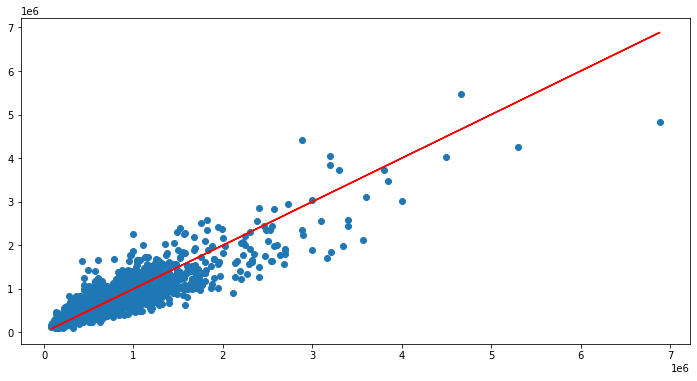

In [119]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')